In [1]:
import torch
import sys
from matplotlib import gridspec
from matplotlib import pyplot as plt
sys.path.append('src')
from score_util_pub import *
from inference import *
import json

/home/grads/xiaoyanzang24/miniconda3/envs/C3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## For SDXL-Turbo


### It seems that turbo doesn't call up block, so use SDXL-light to test

In [ ]:
model = Generator('sdxl-turbo')
# print(dir(model))

In [ ]:
seed = 3
prompt = 'a creative chair'
amplification_factor = [1.0]*7

# You can manually select amplification factor for each block 

amplification_factor[0] = 1.075 # amp factor for down 0 block
amplification_factor[1] = 1.15 # amp factor for down 1 block
amplification_factor[2] = 2.6 # amp factor for down 2 block
amplification_factor[3] = 2.8 # amp factor for middle block

# Or you can use the automatically found params
# Please note that the automatically found params are searched for each block 
# and needs to be further scaled to be used in combination.

file_path = f'./results/sdxl-turbo/chair/amp_factors_80.json'
with open(file_path, 'r') as file:
    data = json.load(file)
amplification_factor[0] = 1+(data[0][0]-1)*0.3
amplification_factor[1] = 1+(data[0][1]-1)*0.3
amplification_factor[2] = 1+(data[0][2]-1)*0.2
amplification_factor[3] = 1+(data[0][3]-1)*0.2


In [ ]:
orig = model.orig(prompt=prompt, seed=seed)
ours = model.c3(prompt=prompt, seed=seed, replace_mask=amplification_factor)
dual = model.dual_stage(prompt=prompt, seed=seed, replace_mask=amplification_factor)

In [ ]:
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax1.imshow(orig)
ax1.axis('off')
ax1.set_title('Original')
ax2.imshow(ours)
ax2.axis('off')
ax2.set_title('C3')
ax3.imshow(dual)
ax3.axis('off')
ax3.set_title('Ours')
plt.tight_layout()
plt.show()

In [ ]:
prompt = 'a creative teddy bear'

orig = model.orig(prompt=prompt, seed=seed)
ours = model.c3(prompt=prompt, seed=seed, replace_mask=amplification_factor)


gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.imshow(orig)
ax1.axis('off')
ax1.set_title('Original')
ax2.imshow(ours)
ax2.axis('off')
ax2.set_title('Ours')
plt.tight_layout()
plt.show()


----

## For SDXL-Lightning

In [2]:
model = Generator('sdxl-light-1')

/home/grads/xiaoyanzang24/cv/C3/diffusers/src/diffusers/configuration_utils.py:245: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.37it/s]


In [4]:
seed = 42
amplification_factor = [1.0]*7

# You can manually select amplification factor for each block 

amplification_factor[0] = 1.1 # amp factor for down 0 block
amplification_factor[1] = 1.3 # amp factor for down 1 block
amplification_factor[2] = 1.6 # amp factor for down 2 block
amplification_factor[3] = 1.8 # amp factor for middle block

# Or you can use the automatically found params
# Please note that the automatically found params are searched for each block 
# and needs to be further scaled to be used in combination.

# file_path = f'./results/sdxl-light-1/house/amp_factors_80.json'
file_path = f'./results/amp_factors_80.json'
with open(file_path, 'r') as file:
    data = json.load(file)
amplification_factor[0] = 1+(data[0][0]-1)*0.2
amplification_factor[1] = 1+(data[0][1]-1)*0.2
amplification_factor[2] = 1+(data[0][2]-1)*0.1
amplification_factor[3] = 1+(data[0][3]-1)*0.1


### house

In [5]:
prompt = 'a creative house'
orig = model.orig(prompt=prompt, seed=seed)

  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
go to up block


100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


In [6]:
c3 = model.c3(prompt=prompt, seed=seed, replace_mask=amplification_factor, cutoff=[10.0,5.0,5.0,5.0,1.0,1.0,1.0])

  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
apply fft on low, replace_mask:  1.08
apply fft on low, replace_mask:  1.1199999999999999
apply fft on low, replace_mask:  1.7000000000000002
run fft on mid
go to up block


100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0
up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0
up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0


In [7]:
dual = model.dual_stage(prompt=prompt, seed=seed, replace_mask=amplification_factor, filter_factor=0.8)

  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
apply fft on low, replace_mask:  1.08
apply fft on low, replace_mask:  1.1199999999999999
apply fft on low, replace_mask:  1.7000000000000002
run fft on mid
go to up block
up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0
run gabor on up


100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0
run gabor on up
up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0
run gabor on up


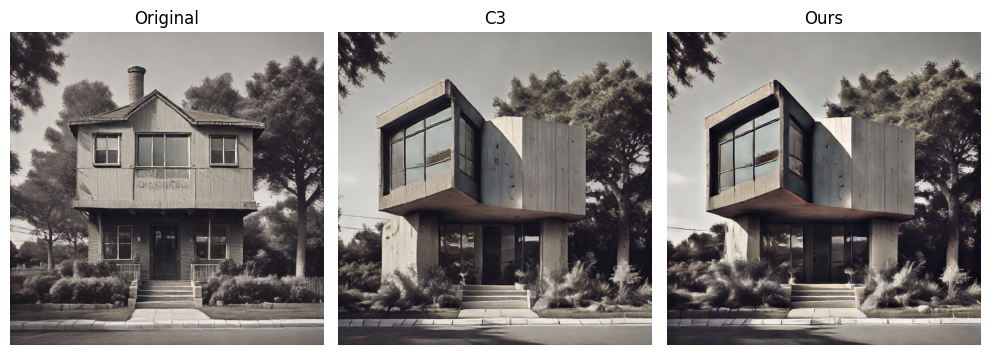

In [8]:
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax1.imshow(orig)
ax1.axis('off')
ax1.set_title('Original')
ax2.imshow(c3)
ax2.axis('off')
ax2.set_title('C3')
ax3.imshow(dual)
ax3.axis('off')
ax3.set_title('Ours')
plt.tight_layout()
plt.show()

### chair

In [34]:
prompt = 'a creative chair'
orig = model.orig(prompt=prompt, seed=seed)

  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
go to up block


100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


In [35]:
c3 = model.c3(prompt=prompt, seed=seed, replace_mask=amplification_factor, cutoff=[10.0,5.0,5.0,5.0,1.0,1.0,1.0])

  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
apply fft on low, replace_mask:  1.08
apply fft on low, replace_mask:  1.1199999999999999
apply fft on low, replace_mask:  1.7000000000000002
run fft on mid
go to up block
up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0


100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0
up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0


In [36]:
dual = model.dual_stage(prompt=prompt, seed=seed, replace_mask=amplification_factor, filter_factor=0.8)

  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
apply fft on low, replace_mask:  1.08
apply fft on low, replace_mask:  1.1199999999999999
apply fft on low, replace_mask:  1.7000000000000002
run fft on mid
go to up block
up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0
run gabor on up


100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0
run gabor on up
up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0
run gabor on up


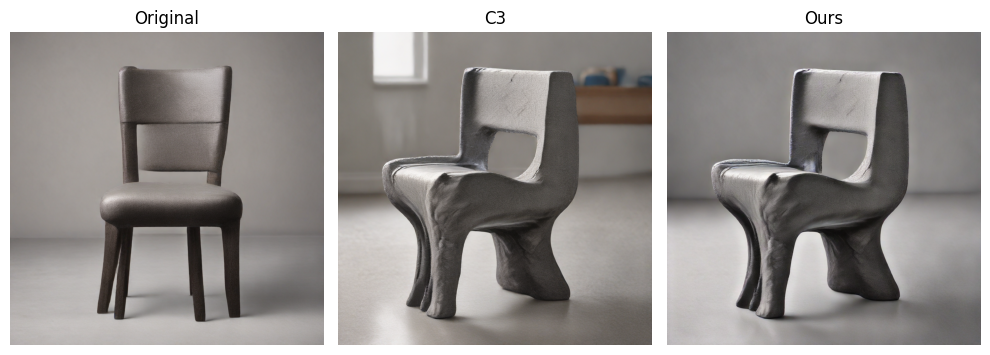

In [37]:
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax1.imshow(orig)
ax1.axis('off')
ax1.set_title('Original')
ax2.imshow(c3)
ax2.axis('off')
ax2.set_title('C3')
ax3.imshow(dual)
ax3.axis('off')
ax3.set_title('Ours')
plt.tight_layout()
plt.show()

### cabin

In [26]:
prompt = 'a creative log cabin'
orig = model.orig(prompt=prompt, seed=seed)

  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
go to up block


100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


In [27]:
c3 = model.c3(prompt=prompt, seed=seed, replace_mask=amplification_factor, cutoff=[10.0,5.0,5.0,5.0,1.0,1.0,1.0])

  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
apply fft on low, replace_mask:  1.08
apply fft on low, replace_mask:  1.1199999999999999
apply fft on low, replace_mask:  1.7000000000000002
run fft on mid
go to up block
up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0


100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0
up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0


In [28]:
dual = model.dual_stage(prompt=prompt, seed=seed, replace_mask=amplification_factor, filter_factor=0.8)

  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
apply fft on low, replace_mask:  1.08
apply fft on low, replace_mask:  1.1199999999999999
apply fft on low, replace_mask:  1.7000000000000002
run fft on mid
go to up block
up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0
run gabor on up


100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0
run gabor on up
up block - hidden_mask is not none
UP BLOCK replace_on TYPE/VALUE: <class 'str'> freq
UP BLOCK replace_mask 1.0
run gabor on up


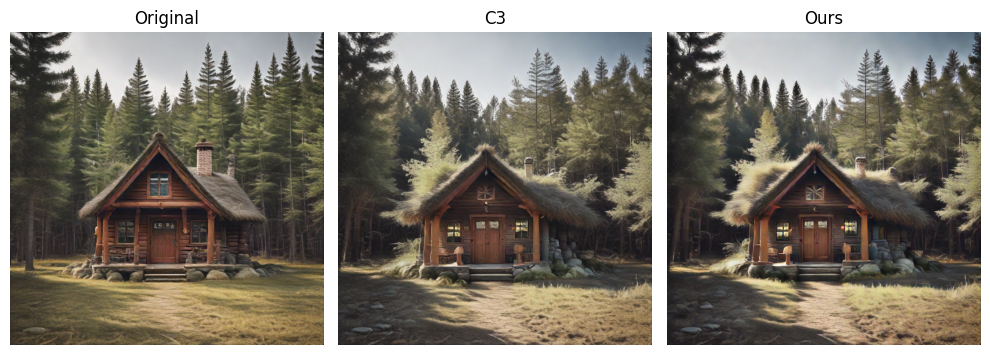

In [29]:
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax1.imshow(orig)
ax1.axis('off')
ax1.set_title('Original')
ax2.imshow(c3)
ax2.axis('off')
ax2.set_title('C3')
ax3.imshow(dual)
ax3.axis('off')
ax3.set_title('Ours')
plt.tight_layout()
plt.show()